<a href="https://colab.research.google.com/github/channacy/PHIL311_FinalProject/blob/main/Twitter_Analysis_Cancel_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import models

import re
import spacy




In [3]:
tweets = pd.read_csv("cancel_trump_exact_tweets.csv")
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count
0,BucketBuoy,2012-12-26 22:20:01+00:00,1.0,Twitter for iPhone,"BREAKING NEWS: Trump, officials cancel Trump o...",1.0
1,ldiproperzio,2012-12-26 21:49:51+00:00,0.0,Twitter for Websites,"Trump, officials cancel Trump on the Ocean pro...",0.0
2,jonsaidstuff,2012-12-26 21:04:16+00:00,1.0,Twitter for Android,"""@News12LI: Trump, officials cancel Trump on t...",0.0
3,News12LI,2012-12-26 20:57:54+00:00,2.0,Twitter Web Client,"Trump, officials cancel Trump on the Ocean pro...",8.0
4,Its_crap,2012-11-08 05:51:10+00:00,0.0,Twitter for iPad,@realDonaldTrump called NBC's Brian Williams a...,0.0


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             7586 non-null   object 
 1   Date Created     7586 non-null   object 
 2   Number of Likes  7585 non-null   float64
 3   Source of Tweet  7585 non-null   object 
 4   Tweet            7585 non-null   object 
 5   Retweet Count    7584 non-null   float64
dtypes: float64(2), object(4)
memory usage: 355.7+ KB


In [10]:
tweets['clean_tweets'] = tweets['Tweet'].str.lower()
tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")
tweets.head()

<ipython-input-10-6163b0f575f9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")


,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,BucketBuoy,2012-12-26 22:20:01+00:00,1.0,Twitter for iPhone,"BREAKING NEWS: Trump, officials cancel Trump o...",1.0,breaking news trump officials cancel trump on ...
1,ldiproperzio,2012-12-26 21:49:51+00:00,0.0,Twitter for Websites,"Trump, officials cancel Trump on the Ocean pro...",0.0,trump officials cancel trump on the ocean proj...
2,jonsaidstuff,2012-12-26 21:04:16+00:00,1.0,Twitter for Android,"""@News12LI: Trump, officials cancel Trump on t...",0.0,news12li trump officials cancel trump on the o...
3,News12LI,2012-12-26 20:57:54+00:00,2.0,Twitter Web Client,"Trump, officials cancel Trump on the Ocean pro...",8.0,trump officials cancel trump on the ocean proj...
4,Its_crap,2012-11-08 05:51:10+00:00,0.0,Twitter for iPad,@realDonaldTrump called NBC's Brian Williams a...,0.0,realdonaldtrump called nbcs brian williams a d...


In [14]:
stop = ['of', 'thus', 'somehow', 'many', 'until', 'he', 'name', 'whereas', 'namely', 'much', 'still', 'my', 'only', 'towards', 'am', 'below', 'something', 'everywhere', 'been', 'same', 'whereafter', 'none', 'except', 'have', 'yourselves', 'then', 'never', 'full', 'mostly', 'further', 'several', 'bill', 'together', 'can', 'i', 'which', 'might', 'therefore', 'nevertheless', 'thereby', 'formerly', 'were', 'whereupon', 'amoungst', 'thereupon', 'hereupon', 'next', 'during', 'what', 'yourself', 'across', 'was', 'whole', 'up', 'if', 'per', 'myself', 'they', 'wherein', 'she', 'since', 'behind', 'first', 'take', 'fire', 'least', 'mill', 'inc', 'made', 'latter', 'noone', 'four', 'give', 'therein', 'describe', 'others', 'whither', 'besides', 'itself', 'whereby', 'couldnt', 'rather', 'either', 'sixty', 'here', 'will', 'done', 'beyond', 'own', 'against', 'this', 'before', 'amongst', 'on', 'become', 'more', 'front', 'whenever', 'thick', 'nothing', 'again', 'became', 'me', 'thence', 'yet', 'eg', 'sometime', 'ltd', 'always', 'at', 'whence', 'ie', 'six', 'those', 'sincere', 'any', 'latterly', 'nobody', 'why', 'part', 'thru', 'nor', 'in', 'side', 'ours', 'as', 'bottom', 'five', 'third', 'co', 'such', 'himself', 'whoever', 'him', 'thin', 'would', 'these', 'herein', 'upon', 'each', 'you', 'beforehand', 'no', 'his', 'two', 'three', 'the', 'few', 'it', 'yours', 'already', 'interest', 'whom', 'with', 'for', 'other', 'via', 'go', 'onto', 'do', 'get', 'also', 'mine', 'wherever', 'so', 'system', 'us', 'whose', 'after', 'and', 'former', 'all', 'but', 'back', 'too', 'hundred', 'is', 'between', 'even', 'hence', 'whatever', 'hasnt', 'along', 'most', 'herself', 'un', 'has', 'anyone', 'fifty', 'meanwhile', 'being', 'otherwise', 'anywhere', 'serious', 'under', 'seeming', 'by', 'often', 'neither', 'hereby', 'around', 'afterwards', 'an', 'everything', 'who', 'due', 'anyhow', 'than', 'indeed', 'etc', 'to', 'them', 'amount', 'both', 'moreover', 'our', 'de', 'eleven', 'well', 'out', 'or', 'beside', 'because', 'through', 'now', 'your', 'where', 'found', 'had', 'ten', 'almost', 'twenty', 'its', 'once', 'move', 'although', 'nowhere', 'into', 'perhaps', 'con', 'throughout', 'twelve', 'not', 'while', 'detail', 'top', 'we', 'enough', 'from', 'ourselves', 'whether', 'thereafter', 'somewhere', 'please', 'find', 'how', 'fifteen', 'becoming', 'put', 'their', 'nine', 'within', 'one', 'cant', 'are', 'last', 'a', 'seem', 'toward', 'her', 'off', 'show', 'above', 're', 'else', 'cry', 'keep', 'could', 'some', 'see', 'eight', 'anyway', 'hereafter', 'themselves', 'empty', 'elsewhere', 'when', 'ever', 'must', 'seemed', 'very', 'sometimes', 'another', 'becomes', 'may', 'everyone', 'hers', 'fill', 'among', 'should', 'over', 'be', 'anything', 'seems', 'without', 'about', 'that', 'down', 'there', 'though', 'someone', 'alone', 'every', 'call', 'however', 'less', 'forty', 'cannot','the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']
tweets = tweets[tweets['clean_tweets'].notnull()]

tweets['clean_tweets'] = tweets['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [15]:
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,BucketBuoy,2012-12-26 22:20:01+00:00,1.0,Twitter for iPhone,"BREAKING NEWS: Trump, officials cancel Trump o...",1.0,breaking news trump officials cancel trump oce...
1,ldiproperzio,2012-12-26 21:49:51+00:00,0.0,Twitter for Websites,"Trump, officials cancel Trump on the Ocean pro...",0.0,trump officials cancel trump ocean project htt...
2,jonsaidstuff,2012-12-26 21:04:16+00:00,1.0,Twitter for Android,"""@News12LI: Trump, officials cancel Trump on t...",0.0,news12li trump officials cancel trump ocean pr...
3,News12LI,2012-12-26 20:57:54+00:00,2.0,Twitter Web Client,"Trump, officials cancel Trump on the Ocean pro...",8.0,trump officials cancel trump ocean project htt...
4,Its_crap,2012-11-08 05:51:10+00:00,0.0,Twitter for iPad,@realDonaldTrump called NBC's Brian Williams a...,0.0,realdonaldtrump called nbcs brian williams dum...


Visualize how mentions of "cancel Trump" have changed over time


In [16]:
tweets["contains_cancel_trump"] = tweets["clean_tweets"].str.contains("cancel trump")
cancel_trump_counts = sum(tweets["contains_cancel_trump"])
print(cancel_trump_counts)

7565


In [21]:
tweets["Year Created"] = tweets["Date Created"].str[0:4]


In [22]:
yearly_mentions = tweets.groupby("Year Created").sum().reset_index()
yearly_mentions

,Year Created,Number of Likes,Retweet Count,contains_cancel_trump
0,2012,6.0,13.0,22
1,2013,0.0,0.0,2
2,2014,0.0,1.0,2
3,2015,286.0,306.0,550
4,2016,1594.0,1032.0,994
5,2017,6992.0,3286.0,1000
6,2018,10441.0,3976.0,998
7,2019,5436.0,1092.0,997
8,2020,9148.0,1694.0,1001
9,2021,14620.0,3087.0,1000


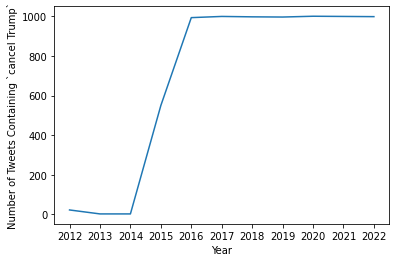

In [26]:
plt.plot(yearly_mentions["Year Created"], yearly_mentions["contains_cancel_trump"])
plt.xlabel("Year")
plt.ylabel("Number of Tweets Containing `cancel Trump`")
plt.show()

Sentiment Analysis

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:
tweets["polarity"] = tweets["clean_tweets"].apply(lambda x: sia.polarity_scores(x))

In [31]:
tweets[['neg', 'neu', 'pos', 'compound']] = tweets['polarity'].apply(pd.Series)
tweets.drop('polarity', axis=1)

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets,contains_cancel_trump,Year Created,neg,neu,pos,compound
0,BucketBuoy,2012-12-26 22:20:01+00:00,1.0,Twitter for iPhone,"BREAKING NEWS: Trump, officials cancel Trump o...",1.0,breaking news trump officials cancel trump oce...,True,2012,0.167,0.833,0.000,-0.2500
1,ldiproperzio,2012-12-26 21:49:51+00:00,0.0,Twitter for Websites,"Trump, officials cancel Trump on the Ocean pro...",0.0,trump officials cancel trump ocean project htt...,True,2012,0.222,0.778,0.000,-0.2500
2,jonsaidstuff,2012-12-26 21:04:16+00:00,1.0,Twitter for Android,"""@News12LI: Trump, officials cancel Trump on t...",0.0,news12li trump officials cancel trump ocean pr...,True,2012,0.234,0.526,0.240,0.2732
3,News12LI,2012-12-26 20:57:54+00:00,2.0,Twitter Web Client,"Trump, officials cancel Trump on the Ocean pro...",8.0,trump officials cancel trump ocean project htt...,True,2012,0.200,0.800,0.000,-0.2500
4,Its_crap,2012-11-08 05:51:10+00:00,0.0,Twitter for iPad,@realDonaldTrump called NBC's Brian Williams a...,0.0,realdonaldtrump called nbcs brian williams dum...,True,2012,0.471,0.529,0.000,-0.8360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,ElBanadoro,2022-08-27 18:22:16+00:00,0.0,Twitter Web App,@AleteiaES @YvesPDB Shia le bœuf le même qui m...,0.0,aleteiaes yvespdb shia le bœuf le même qui mil...,True,2022,0.125,0.875,0.000,-0.2500
7582,The_NewArab,2022-08-27 15:55:10+00:00,3.0,Hootsuite Inc.,The plan to host the Aramco Team Series at the...,0.0,plan host aramco team series trump golf links ...,True,2022,0.077,0.923,0.000,-0.2500
7583,Al20209736,2022-08-27 15:01:17+00:00,0.0,Twitter for iPhone,@gtconway3d What we really need to do is cut o...,0.0,gtconway3d really need cut publicity trump lov...,True,2022,0.290,0.464,0.245,0.0828
7584,dianecloutier9,2022-08-27 11:53:11+00:00,0.0,Twitter Web App,TWO YEARS LATER: Davos and the Plot to Cancel ...,0.0,years later davos plot cancel trump httpstcoiz...,True,2022,0.222,0.778,0.000,-0.2500


In [33]:
positive = sum(tweets["pos"])
negative = sum(tweets["neg"])
compound = sum(tweets["compound"])
neutral = sum(tweets["neu"])

print("Positive: ", positive)
print("Negative ", negative)
print("Compound", compound)
print("Neutral", neutral)

Positive:  784.7059999999943
Negative  1944.7370000000055
Compound -1482.4249000000164
Neutral 4855.635999999995


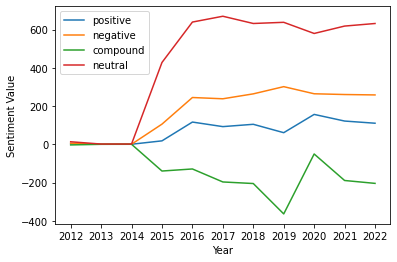

In [35]:
df = tweets.groupby("Year Created").sum().reset_index()

plt.plot(df["Year Created"], df["pos"], label="positive")
plt.plot(df["Year Created"], df["neg"], label = "negative")
plt.plot(df["Year Created"], df["compound"], label = "compound")
plt.plot(df["Year Created"], df["neu"], label = "neutral")
plt.xlabel("Year")
plt.ylabel("Sentiment Value")
plt.legend()
plt.show()


Topic Modelling

In [38]:
data = tweets["clean_tweets"].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data[:1]

['breaking news trump officials cancel trump ocean project httptcobnpkub8u jonesbeach news12li']

In [39]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['breaking', 'news', 'trump', 'officials', 'cancel', 'trump', 'ocean', 'project', 'httptcobnpkub', 'jonesbeach', 'news', 'li']]


In [40]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['breaking', 'news', 'trump', 'officials', 'cancel', 'trump', 'ocean', 'project', 'httptcobnpkub', 'jonesbeach', 'news', 'li']


In [46]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [48]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [49]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['break', 'news', 'trump', 'official', 'cancel', 'ocean', 'project']]


In [53]:
tweets_lemmatized=data_lemmatized


In [54]:
id2word = Dictionary(tweets)
corpus = [id2word.doc2bow(tweet) for tweet in tweets_lemmatized]


In [55]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [56]:
lda_model.print_topics()

[(0,
  '0.057*"rally" + 0.053*"supporter" + 0.053*"mean" + 0.046*"ve" + 0.026*"true" + 0.025*"month" + 0.025*"ago" + 0.022*"call" + 0.021*"silence" + 0.018*"able"'),
 (1,
  '0.066*"biden" + 0.038*"time" + 0.037*"day" + 0.034*"think" + 0.032*"re" + 0.030*"need" + 0.020*"leave" + 0.019*"support" + 0.017*"power" + 0.017*"deal"'),
 (2,
  '0.118*"want" + 0.088*"twitter" + 0.045*"country" + 0.043*"account" + 0.034*"really" + 0.032*"dem" + 0.028*"rule" + 0.025*"black" + 0.022*"httpstco" + 0.021*"company"'),
 (3,
  '0.368*"cancel" + 0.246*"trump" + 0.017*"official" + 0.013*"policy" + 0.013*"plot" + 0.010*"alabama_official" + 0.010*"election" + 0.009*"come" + 0.009*"good" + 0.008*"pity_party"'),
 (4,
  '0.063*"take" + 0.048*"credit" + 0.043*"ask" + 0.033*"give" + 0.030*"claim" + 0.025*"democracy" + 0.020*"ill" + 0.019*"event" + 0.018*"corruption" + 0.018*"wonder"'),
 (5,
  '0.042*"plan" + 0.028*"stop" + 0.027*"medium" + 0.027*"work" + 0.025*"tell" + 0.025*"amp" + 0.024*"m" + 0.023*"order" + 0.0

In [58]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#a measure of how well sentences fit together in document
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.053100738419163

Coherence Score:  0.39557808873275324


In [63]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 25.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [64]:
import pyLDAvis
import pyLDAvis.gensim

In [65]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.394629 -0.028221       1        1  39.472492
6      0.148427 -0.077702       2        1  13.288393
1      0.047041  0.020497       3        1  10.198156
9     -0.018353  0.392648       4        1   8.721594
5     -0.060522 -0.045398       5        1   8.395983
8     -0.063631 -0.048039       6        1   7.452276
2     -0.075381 -0.071430       7        1   6.990434
0     -0.126699 -0.053592       8        1   2.831057
4     -0.127744 -0.048088       9        1   2.429321
7     -0.117766 -0.040677      10        1   0.220294, topic_info=          Term         Freq        Total Category  logprob  loglift
1       cancel  9443.000000  9443.000000  Default  30.0000  30.0000
6        trump  6125.000000  6125.000000  Default  29.0000  29.0000
206       want   516.000000   516.000000  Default  28.0000  28.0000
229        try   518.000000   518.000000  Default  27.0000  27.0000
392    twitter   384.000000   384.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
25      romney     0.014395     0.799064  Topic10  -9.1696   2.1014
26       trend     0.014395    11.545401  Topic10  -9.1696  -0.5692
27      appear     0.014395    22.245497  Topic10  -9.1696  -1.2250
28   celebrity     0.014395     7.031606  Topic10  -9.1696  -0.0733
29      couple     0.014395     2.153889  Topic10  -9.1696   1.1098

[387 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1116      8  0.973181            able
772       7  0.998953         account
1072      5  0.981614             act
1214      3  0.991961        actually
3713      1  0.989476  administration
...     ...       ...             ...
250       5  0.996684            work
273       7  0.985189           world
73        4  0.992525           wrong
255       2  0.998366            year
2401      2  0.997553         youtube

[342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 2, 10, 6, 9, 3, 1, 5, 8])

In [66]:
list(lda_model.get_document_topics(corpus[1]))


[(0, 0.010948798),
 (1, 0.15731345),
 (2, 0.0276725),
 (3, 0.5277867),
 (5, 0.032601118),
 (6, 0.0554582),
 (8, 0.029511474),
 (9, 0.14715517)]

In [67]:
lda_model.show_topic(0)


[('rally', 0.057145238),
 ('supporter', 0.052803885),
 ('mean', 0.052682728),
 ('ve', 0.046285544),
 ('true', 0.025519362),
 ('month', 0.025386391),
 ('ago', 0.024791067),
 ('call', 0.022151863),
 ('silence', 0.02058154),
 ('able', 0.01753604)]

Find dominant topic in each tweet

In [69]:
def find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dominant_topic = row[0]
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_dominant_topic = find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=tweets)

# Format
df_dominant_topic = df_dominant_topic.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Text']

# Show
df_dominant_topic.head(10)


<ipython-input-69-ff6457fc9b4a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)
<ipython-input-69-ff6457fc9b4a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Text
0,0,3.0,0.5758,"[break, news, trump, official, cancel, ocean, ..."
1,1,3.0,0.5278,"[trump, official, cancel, ocean, project, pmeo..."
2,2,3.0,0.4541,"[news, trump, official, cancel, ocean, project..."
3,3,3.0,0.5948,"[trump, official, cancel, ocean, project]"
4,4,3.0,0.3645,"[realdonaldtrump, call, insult, repeatedly, go..."
5,5,3.0,0.4300,"[cancel, pathetic, apprentice, disgrace, nbcpo..."
6,6,3.0,0.5356,"[nancywonderful, time, cancel, trump]"
7,7,3.0,0.3914,"[cancel, apprentice, thank]"
8,8,3.0,0.6278,"[cancel, trump]"
9,9,3.0,0.6277,"[maddow, cancel, trump]"


Find the most representative document for each topic

In [70]:
# Group top 5 sentences under each topic
df_topics_doc = pd.DataFrame()

df_dominant_topic_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in df_dominant_topic_grpd:
    df_topics_doc = pd.concat([df_topics_doc, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
df_topics_doc.reset_index(drop=True, inplace=True)

# Format
df_topics_doc.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Text"]

# Show
df_topics_doc

,Document_No,Topic_Num,Topic_Perc_Contrib,Text
0,130,0.0,0.4694,"[join, public, rally, demand, cancel, trump, s..."
1,7351,1.0,0.6742,"[ahrehead, ziggystardog, skeeduu, dickchibble,..."
2,5142,2.0,0.6079,"[realdonaldtrump, larry_kudlow, eamonjaver, re..."
3,6361,3.0,0.8312,"[trump, alabama_official, cancel, trump, rally..."
4,7504,4.0,0.4261,"[lepapillonblu, hopefully, plug, get, pulled, ..."
5,4137,5.0,0.5298,"[exnational_security, adviser_wante, cancel, t..."
6,76,6.0,0.5838,"[nice, ball, bow, pressure, cancel, trump, cou..."
7,4074,8.0,0.6831,"[critical, investment, central, correct, longs..."
8,896,9.0,0.5966,"[maybe, make, great, term, altogether]"


Topic distribution across documents¶

<Axes: >

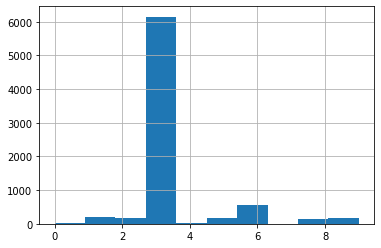

In [71]:
df_dominant_topic['Dominant_Topic'].hist(bins=10)


In [72]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_topics

,Num_Documents,Perc_Documents
3.0,6152,0.8111
6.0,559,0.0737
1.0,190,0.0250
5.0,169,0.0223
2.0,166,0.0219
9.0,163,0.0215
8.0,133,0.0175
4.0,32,0.0042
0.0,21,0.0028


<Axes: >

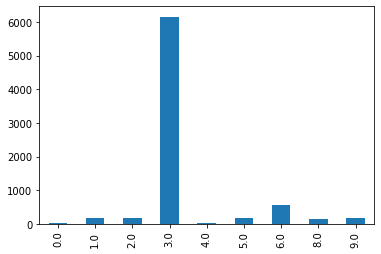

In [73]:
df_topics.sort_index().Num_Documents.plot.bar()


<Axes: >

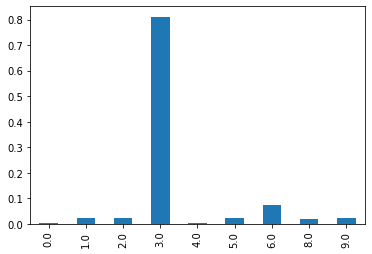

In [74]:
df_topics.sort_index().Perc_Documents.plot.bar()


In [77]:
tfidf = models.TfidfModel(corpus, smartirs='ntc')
tfidf_corpus=[]
for doc in tfidf[corpus]:
   tfidf_corpus.append([(id, np.around(freq,decimals=2)) for id, freq in doc])

lda_model2 = LdaModel(corpus=tfidf_corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [78]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -12.137653614658515

Coherence Score:  0.4769556523883668


In [79]:
lda_model2.print_topics()


[(0,
  '0.020*"month" + 0.014*"wish" + 0.003*"integrity" + 0.002*"fundraiser" + 0.002*"request" + 0.002*"hotel" + 0.000*"implore_stephen" + 0.000*"implores_controversial" + 0.000*"momofuku_investor" + 0.000*"rating"'),
 (1,
  '0.045*"people" + 0.038*"day" + 0.034*"go" + 0.031*"year" + 0.029*"time" + 0.029*"plan" + 0.020*"need" + 0.017*"leave" + 0.017*"pay" + 0.014*"support"'),
 (2,
  '0.075*"want" + 0.042*"think" + 0.041*"re" + 0.031*"take" + 0.028*"tell" + 0.011*"cause" + 0.008*"stand" + 0.006*"promote" + 0.003*"coward" + 0.002*"excuse"'),
 (3,
  '0.032*"trump" + 0.019*"official" + 0.015*"insulin" + 0.012*"plot" + 0.010*"say" + 0.009*"biden" + 0.009*"price" + 0.007*"alabama_official" + 0.007*"cancel" + 0.006*"let"'),
 (4,
  '0.053*"s" + 0.048*"twitter" + 0.033*"get" + 0.032*"account" + 0.021*"really" + 0.016*"believe" + 0.015*"big" + 0.010*"world" + 0.009*"kill" + 0.008*"real"'),
 (5,
  '0.043*"know" + 0.037*"work" + 0.029*"m" + 0.026*"stop" + 0.022*"political" + 0.020*"amp" + 0.019*"

In [80]:
vis2 = pyLDAvis.gensim.prepare(lda_model2, tfidf_corpus, id2word)
vis2

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.360738 -0.009453       1        1  68.998672
1     -0.057135 -0.227758       2        1  10.569501
4     -0.045244  0.043084       3        1   5.152986
5     -0.046410  0.046237       4        1   3.304463
6     -0.040312  0.021778       5        1   3.114610
2     -0.041009  0.035005       6        1   2.476592
9     -0.041000  0.035005       7        1   2.116450
8     -0.036343  0.026635       8        1   1.991952
7     -0.028298  0.016621       9        1   1.200316
0     -0.024988  0.012846      10        1   1.074457, topic_info=                            Term       Freq      Total Category  logprob  \
229                          try  47.000000  47.000000  Default  30.0000   
618                       people  82.000000  82.000000  Default  29.0000   
1124                         day  69.000000  69.000000  Default  28.0000   
138                            s  47.000000  47.000000  Default  27.0000   
12                            go  62.000000  62.000000  Default  26.0000   
...                          ...        ...        ...      ...      ...   
6462  jim_jordan_realdonaldtrump   0.019383   0.598091  Topic10  -9.1748   
116                    httpstcop   0.019766   1.582831  Topic10  -9.1553   
3884                      relief   0.019398   3.238350  Topic10  -9.1741   
8863                  initiative   0.019389   6.131113  Topic10  -9.1745   
9322                    medicare   0.019200   5.834916  Topic10  -9.1843   

      loglift  
229   30.0000  
618   29.0000  
1124  28.0000  
138   27.0000  
12    26.0000  
...       ...  
6462   1.1040  
116    0.1504  
3884  -0.5843  
8863  -1.2231  
9322  -1.1833  

[436 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1116      8  0.964462     able
772       3  0.987410  account
892       3  0.808615     acct
1072      4  0.913330      act
5791      1  1.011254    actor
...     ...       ...      ...
238       4  0.867883     word
250       4  0.972781     work
273       3  0.967181    world
255       2  0.985853     year
2401      1  1.001787  youtube

[203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 6, 7, 3, 10, 9, 8, 1])